## Пояснення прогнозів моделі за допомогою Shapley values

У цьому ноутбуці я познайомлю вас з **бібліотекою SHAP** та **значеннями Shapley** в Python. Вони використовуються для пояснення прогнозів вашої моделі: як кожна з ознак вплинула саме на такий прогноз. Також ми познайомимось з розділом машинного навчання - eXplainable AI (XAI) - інтерпретоване машинне навчання.

# **1. Інтерпретоване машинне навчання**

Машинне навчання має великий потенціал для покращення продуктів, процесів і послуг. Набір даних подається як вхідні дані, а алгоритми генерують бажаний вихід. Але алгоритми не пояснюють свої прогнози безпосередньо. Це може бути бар'єром для впровадження машинного навчання, адже ми не розуміємо, чому модель приймає ті чи інші рішеня і не можемо, до прикладу, робити чи не робити операцію людині без цього розуміння. В такому випадку на допомогу приходять методи для інтерпретації машинного навчання.

Наша модель повинна бути інтерпретованою, і в ідеалі повинна демонструвати також наступні риси:

1. **Fairness (Справедливість)** - Забезпечення того, щоб прогнози були неупередженими і не дискримінували захищені групи ані явно, ані неявно. Інтерпретована модель може пояснити, чому вона вирішила, що певна особа не повинна отримати кредит, і людині-оператору так стає легше судити, чи базується рішення на вивченій демографічній (наприклад, расовій) упередженості.
2. **Privacy (Конфіденційність)** - Забезпечення захисту чутливої інформації в даних.
3. **Reliability or Robustness (Надійність або стійкість)** - Забезпечення того, щоб незначні зміни у вхідних даних не призводили до великих змін у прогнозі.
4. **Causality (Причинність)** - Перевірка того, що виявляються лише причинні зв'язки. Памʼятаємо, що кореляція не значить каузальність.
5. **Trust (Довіра)** - Людям легше довіряти системі, яка пояснює свої рішення, порівняно з "чорною скринькою" (black box).

# **Найбільш поширені методи для пояснення (explainability)**

Наступні методи не залежать від будь-якої специфіки моделі, тобто ви можете використовувати ці методи з будь-якою моделлю і це зручно - такий клас методів називають "model agnostic":

- Shapely Values (розберемо тут детальніше, це бібліотека, яка активно підтримується і часто використовується в індустрії)
- [LIME](https://github.com/marcotcr/lime) (Local Interpretable Model-Agnostic Explanations)
- Feature Importance (з деякими методами для конкретних класів моделей ми вже познайомились - в лін. та лог. регресіях, деревах)
- Feature Interaction
- Surrogate Models - сурогатні моделі навчаються для наближення прогнозів базової моделі чорного ящика.

# **2. Вступ до бібліотеки SHAP та значень Шеплі**

Python надає бібліотеку під назвою [SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html) від Лундберга та Лі, яка використовується для пояснення індивідуальних прогнозів моделей. SHAP базується на теоретично оптимальних для гри [значеннях Шеплі](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley).



## **2.1 Що таке Значення Шеплі** <a class="anchor" id="2.1"></a>

У термінах інтерпретованого машинного навчання - Значення Шеплі можна визначити наступним чином:

**Прогноз можна пояснити, припустивши, що кожне значення ознаки екземпляра (значення фічі для окремого пркладу в даних) є “гравцем” у грі, де прогноз є виплатою. Значення Шеплі – метод з теорії коаліційних ігор – показує, як справедливо розподілити “виплату” між ознаками.**

Аби детальніше дізнатись про те, як працюють значення Шеплі, будь ласка, прочитайте розділ - [Значення Шеплі](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley).

## **2.2 Бібліотека SHAP** <a class="anchor" id="2.2"></a>

Бібліотека **SHAP** в Python має вбудовані функції для використання значень Шеплі з метою інтерпретації моделей машинного навчання. Вона пропонує як оптимізовані методи для моделей на основі дерев, так і універсальні підходи для пояснення будь-якої "чорної скриньки", якщо можна отримати її прогнози.

Основна реалізація **SHAP** була запропонована Лундбергом і Лі та впроваджена у [Python-пакеті SHAP](https://github.com/slundberg/shap). У цьому пакеті є два основні методи оцінки значень Шеплі:

- **KernelSHAP** – універсальний підхід, який можна застосовувати до будь-якої моделі. Він натхненний [локальними сурогатними моделями](https://christophm.github.io/interpretable-ml-book/lime.html#lime) і працює за принципом зваженої лінеарної апроксимації. KernelSHAP емулює відсутність певних ознак шляхом заміни їхніх значень випадковими вибірками, а потім оцінює внесок кожної ознаки на основі усереднених змін у прогнозах. Його основний недолік — висока обчислювальна складність, особливо для великих датасетів.

- **TreeSHAP** – ефективний алгоритм для оцінки значень Шеплі, оптимізований для моделей на основі дерев (наприклад, **Random Forest, XGBoost, LightGBM, CatBoost**). Він обчислює внесок кожної ознаки в прогноз, використовуючи особливості структурованих ансамблевих моделей, що значно пришвидшує розрахунки порівняно з KernelSHAP.

Перевага **TreeSHAP** над **KernelSHAP** полягає у швидкості: він працює за **поліноміальний час**, тоді як KernelSHAP — за **експоненційний** (що робить його непридатним для великих моделей). Таким чином, якщо модель базується на деревах, варто використовувати TreeSHAP. Для нейронних мереж або інших типів моделей доведеться звертатися до KernelSHAP або альтернативних підходів.

Окрім пояснення окремих прогнозів, SHAP надає **глобальні методи інтерпретації**, які агрегують значення Шеплі по всьому набору даних. Один із найнаочніших методів візуалізації — **SHAP Force Plot**. Він показує, як кожна ознака впливає на конкретний прогноз:

- **Базовий прогноз** (середнє значення всіх прогнозів) є стартовою точкою.
- Кожна ознака має свій **внесок**, що або збільшує, або зменшує прогноз.
- На графіку кожен внесок показаний у вигляді стрілки: якщо значення Шеплі позитивне, воно "штовхає" прогноз вгору, якщо негативне — вниз.
- Сума всіх внесків ознак дає кінцевий прогноз.

Більше деталей про візуалізації SHAP можна знайти у розділі [SHAP](https://christophm.github.io/interpretable-ml-book/shap.html).

Тепер давайте перейдемо до реалізації.

# **3. Реалізація моделі на Python**

Будемо працювати з набором даних California Housing Prices, адже там зрозумілі ознаки і достатньо багато даних аби ретельно подосліджувати, на що звертає увагу модель при передбаченнях.

### Опис набору даних *California Housing Dataset*

Набір даних *California Housing Dataset* містить інформацію про житлові квартали Каліфорнії, отриману на основі перепису населення 1990 року. Він широко використовується для задач регресії, зокрема для прогнозування вартості житла.

#### **Атрибути набору даних:**
1. **longitude** (*довгота*) – географічна координата, що визначає, наскільки на захід розташований будинок; вищі значення означають більшу західну довготу.
2. **latitude** (*широта*) – географічна координата, що визначає, наскільки на північ розташований будинок; вищі значення означають більшу північну широту.
3. **housingMedianAge** (*медіанний вік житлових будинків*) – середній вік будинків у межах одного блоку; нижчі значення вказують на новіші будівлі.
4. **totalRooms** (*загальна кількість кімнат*) – загальна кількість кімнат у житловому кварталі.
5. **totalBedrooms** (*загальна кількість спалень*) – загальна кількість спалень у житловому кварталі.
6. **population** (*населення*) – загальна кількість мешканців у межах кварталу.
7. **households** (*домогосподарства*) – загальна кількість домогосподарств у кварталі, де домогосподарство – це група людей, що спільно проживають в одному житловому приміщенні.
8. **medianIncome** (*медіанний дохід*) – середній дохід домогосподарств у кварталі (виражається в десятках тисяч доларів США).
9. **medianHouseValue** (*медіанна вартість житла*) – середня вартість житла у кварталі (виражається в доларах США).
10. **oceanProximity** (*близькість до океану*) – категоріальна змінна, що вказує на розташування житла відносно океану або моря (наприклад, *<1H OCEAN*, *INLAND*, *NEAR BAY*).

## **3.1 Початкова Налаштування** <a class="anchor" id="3.1"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **3.2 Читання даних** <a class="anchor" id="3.2"></a>

In [ ]:
# Завантажити та переглянути дані

df = pd.read_csv('california_housing_prices.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Цільова змінна - `median_house_value`.

## **3.3 Перегляд основної інформації про дані** <a class="anchor" id="3.3"></a>

In [ ]:
# Переглянути зведену інформацію про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Ми можемо побачити, що `total_bedrooms` має відсутні значення.

## **3.4 Обробка відсутніх значень** <a class="anchor" id="3.4"></a>

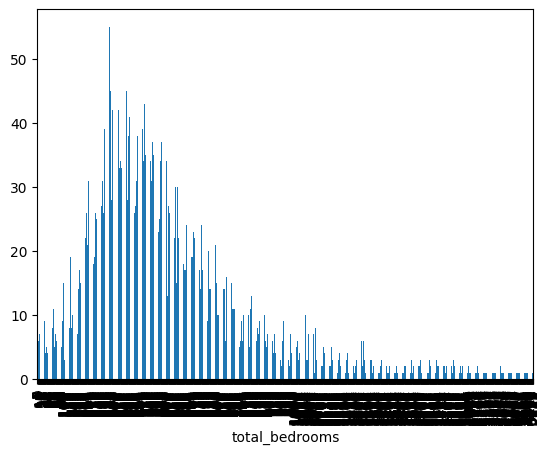

In [ ]:
# Побудуйте розподіл загальної кількості спалень
df['total_bedrooms'].dropna().astype('int32').value_counts().sort_index().plot.bar();

In [ ]:
df['total_bedrooms'].dropna().astype('int32').describe()

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


In [ ]:
df['total_bedrooms'].dropna().astype('int32').mode()

,total_bedrooms
0,280


In [ ]:
df['total_bedrooms'].dropna().astype('int32').value_counts().sort_index()

,count
total_bedrooms,
1,1
2,2
3,5
4,7
5,6
...,...
5290,1
5419,1
5471,1


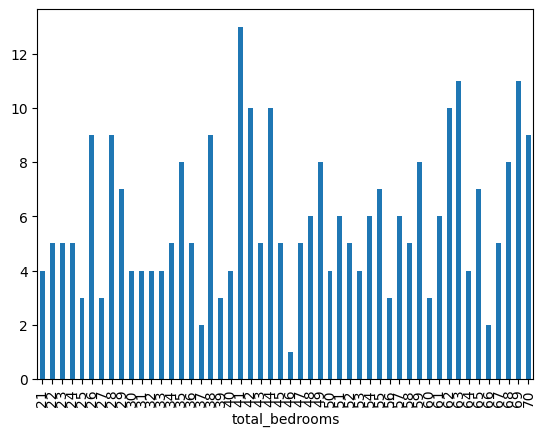

In [ ]:
df['total_bedrooms'].dropna().astype('int32').value_counts().sort_index()[20:70].plot.bar();

- Розподіл `total_bedrooms` має довгий хвіст справа і помітну моду. Можна заповнити відсутні медіаною. А також буде корисно заповнити з MICE і порівняти результати моделі :)

In [ ]:
# Заповнення відсутніх значень у total_bedrooms медіаною
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

<ipython-input-16-493a71836846>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [ ]:
# тепер перевірте на наявність пропущених значень у загальних спальнях
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


У наборі даних немає відсутніх значень.

## 3.5 Розподіл на навчальну та тестову вибірки <a class="anchor" id="3.5"></a>

In [ ]:
X = df[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
y = df['median_house_value']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

## 3.6 Будуємо модель і генеруємо прогнози <a class="anchor" id="3.7"></a>

In [ ]:
# Побудуйте модель за допомогою класифікатора Random Forest

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [ ]:
# Прогнозування на тестових даних
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

## 3.7 Оцінюємо точність <a class="anchor" id="3.9"></a>

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)**(0.5)
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse_train, mse

(64399.897005601786, 68126.3666645792)

## 3.8 Feature importance із вбудованим функціоналом моделі

In [ ]:
# Відображаємо у вигляді DataFrame

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


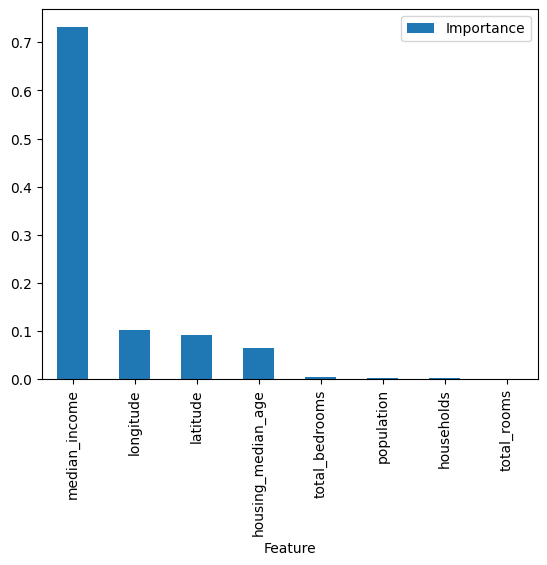

In [ ]:
feature_importance_df.set_index('Feature').plot.bar();

Фіксуємо feature importance, який дає random forest classifier сам по собі, а далі будемо аналізувати глибше з бібліотекою SHAP.

# **4. SHAP Explanation Force Plots**

Спочатку ми будемо використовувати SHAP для пояснення окремих прогнозів (тобто прогнозів на окремих екземплярах, але можна і подивитись як в середньому модель передбачає на всьому наборі даних). Ми можемо використовувати швидкий метод оцінки TreeSHAP замість повільнішого методу KernelSHAP, оскільки випадковий ліс є ансамблем дерев.

Наступна фігура показує SHAP Explanation Force Plots для набору даних про ціни на житло в Каліфорнії.

Якщо бібліотека shap у вас не вставновлена - запустіть спершу рядок для вставнолення. Якщо встановлена і ви запустите цей рядок - нічого страшного не буде :)

In [ ]:
!pip install shap

In [ ]:
# імпортуємо бібліотеку shap
import shap

# створюємо обʼєкт для пояснення прогнозів моделі за допомогою SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# візуалізуємо пояснення першого прогнозу
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [ ]:
X_train.housing_median_age.describe()

,housing_median_age
count,14448.000000
mean,28.618702
std,12.596694
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [ ]:
X_train.iloc[0,:]

,1989
longitude,-119.790
latitude,36.730
housing_median_age,52.000
total_rooms,112.000
total_bedrooms,28.000
population,193.000
households,40.000
median_income,1.975


### **Інтерпретація**

- Наведений вище графік показує, як кожна ознака сприяє зміщенню виходу моделі від базового значення (середнє значення виходу моделі за навчальним набором даних, який ми передали) до виходу моделі. Ознаки, які підвищують прогноз, показані червоним, а ті, що знижують прогноз, - синім.

- Отже, `housing_median_age` підвищує прогноз, а `median_income`, `latitude` та `longitude` знижують прогноз.

- Базове значення `median_house_value` становить 2.063e+5 = 206300.

- Значення виходу становить 70189.83 при `housing_median_age=52`, `median_income=1.975`, `latitude=36.73` та `longitude=-119.8`.

**Якщо ми візьмемо багато пояснень, таких як показано вище, повернемо їх на 90 градусів, а потім розмістимо горизонтально, ми зможемо побачити пояснення для всього набору даних, як показано нижче.**

Наступний графік є інтерактивним. Поводіть мишкою і подивіться на різні значення, також ви можете обирати різні ознаки.

In [ ]:
# Візуалізуємо прогнози навчального набору
# Оскільки набір великий - нам треба зробити самплинг - вибірку випадкових значень, інакше буде графік будуватись нескінченно

# Вибираємо випадкові 500 рядків (або іншу розумну кількість)
sample_size = 500
subset_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)

# Створюємо підмножину SHAP значень
shap_values_subset = shap_values[subset_indices]
X_train_subset = X_train.iloc[subset_indices]

# Візуалізація для підмножини
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_subset, X_train_subset)


### **Як читати цей графік?**

1. **Вісь X (горизонтальна)** – кожна точка на осі X представляє один екземпляр (рядок) із набору даних. Графік впорядкований за схожістю між прогнозами (за замовчуванням), щоб краще показати загальні тренди.

2. **Вісь Y (вертикальна)** – значення прогнозу моделі, \( f(x) \). Це може бути, наприклад, передбачена ціна будинку або інша змінна-мішень.

3. **Синій та червоний кольори** – показують вплив окремих ознак на прогноз:
   - **Червоний (позитивний внесок)** – ці ознаки **збільшують** прогноз моделі.
   - **Синій (негативний внесок)** – ці ознаки **зменшують** прогноз моделі.

4. **Базове значення (expected value)** – модель починає прогноз із базового рівня (середнього значення всіх прогнозів). Далі кожна ознака змінює цей прогноз у той чи інший бік.

5. **Підсумковий прогноз** – це сума базового значення та всіх індивідуальних впливів ознак.


### **Що ми бачимо на графіку?**
- У деяких зразках (зліва) модель прогнозує **вищі значення** (наприклад, високу ціну будинку), і основний внесок у це роблять **позитивні (червоні) впливи**.
- В інших (праворуч) прогноз **нижчий**, і його найбільше "опускають" **сині області**.
- У центральній частині є змішані значення, що означає, що ознаки мають змішаний вплив на різні передбачення.

Цей графік допомагає пояснити, **чому модель зробила саме такий прогноз** для кожного спостереження. Він особливо корисний для аналізу прийняття рішень моделлю та виявлення ключових факторів, що впливають на передбачення.

 # **5. Важливість ознак з SHAP**

Побудуємо графік важливості ознак з бібліотекою SHAP.

Ідея важливості ознак у SHAP досить проста: чим більше **абсолютне значення** Шеплі для ознаки, тим **сильніше вона впливає** на передбачення моделі.  

Щоб оцінити загальну важливість ознак, ми обчислюємо **середнє абсолютне значення** Шеплі для кожної ознаки, враховуючи всі спостереження в наборі даних.  

Потім сортуємо ознаки за спаданням їхньої важливості та будуємо графік. На наступному зображенні показано, які ознаки найбільше впливають на прогноз у навченій моделі випадкового лісу.

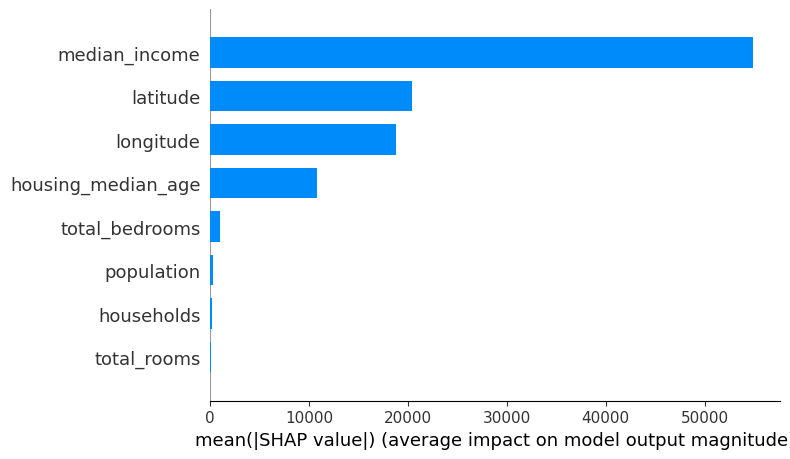

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)  # Обчислення значень SHAP
shap.summary_plot(shap_values, X_train, plot_type="bar")  # Побудова підсумкового графіка SHAP

Бачимо, що як і з вбудованим методом `feature_importance_` моделі найбільш важливою ознакою є `median_income`, що зрозуміло. І в цілому порядок важливості ознак той самий. Це радує)  

Графік важливості ознак корисний, але  містить лише величину важливості ознаки без інформації про те, в якому напрямі ця ознака впливає на передбачення. Для більш інформативного графіка розглянемо SHAP Summary Plot.

# **6. SHAP Summary Plot**  

Графік підсумків (**summary plot**) показує не тільки **важливість ознак**, а й **напрям їхнього впливу** на модель.  

- **Кожна точка** на графіку відповідає **значенню Шеплі** для певної ознаки та конкретного екземпляра в даних.  
- **Вертикальна вісь (OY)** — це самі ознаки, а **горизонтальна вісь (OX)** — значення Шеплі, що показує їхній вплив на прогноз.  
- **Колір точки** відображає **значення ознаки**:  
  - **Сині** точки — низькі значення ознаки.  
  - **Червоні** точки — високі значення ознаки.  
- Точки, які накладаються, **трохи зміщуються випадковим чином** по осі OY (*jittering*). Це допомагає краще побачити, як значення Шеплі розподілені для кожної ознаки.  
- Ознаки розташовані **за спаданням їхньої важливості**, тобто **найважливіші** знаходяться **вгорі графіка**.

In [ ]:
?shap.summary_plot

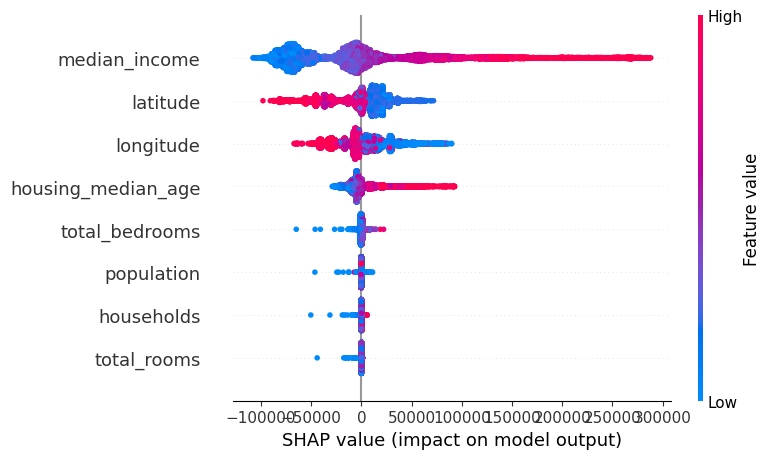

In [ ]:
# Візуалізація підсумкових значень SHAP для навчального набору даних
shap.summary_plot(shap_values, X_train)

Що можемо спостерігати з цього графіку:
  - *Важливість ознак*: Ознаки впорядковані в порядку спадання важливості.
  - *Вплив*: Горизонтальне розташування точки показує, як дане значення ознаки впливає на прогноз - робить його вищим чи нижчим.
  - *Оригінальне значення*: Колір показує, чи є ця змінна високою (в червоному) чи низькою (в синьому) для цього спостереження.
  - *Кореляція*: Високий рівень `median_income` має високий і позитивний вплив на `median_house_value`. "Високий" походить від червоного кольору, а "позитивний" вплив показаний на осі X. Аналогічно, `housing_median_age` позитивно корелює з цільовою змінною `median_house_value`.

# **7. SHAP Dependence Plot (Графік залежності)**

Графік залежності SHAP показує граничний ефект однієї або двох ознак на прогнозований результат моделі машинного навчання. Він вказує, чи є зв'язок між цільовою змінною та ознакою лінійним, монотонним або більш складним (тобто нелінійним і не монотонним).

Давайте створимо графік залежності для median_income:

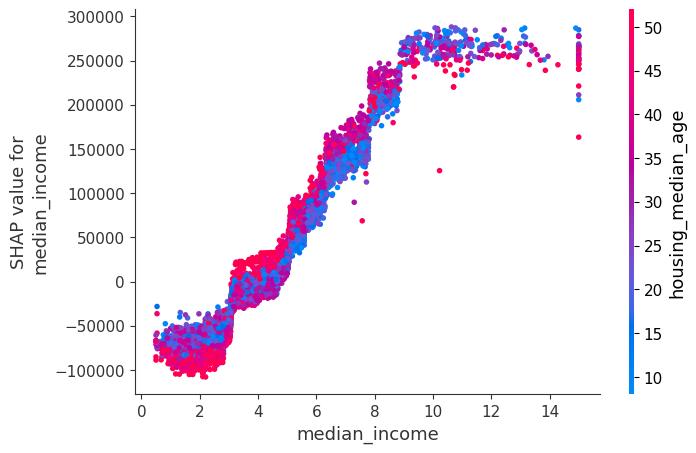

In [ ]:
shap.dependence_plot('median_income', shap_values, X_train)

### **Як читати цей графік?**
1. **Вісь X** – значення ознаки `median_income` (медіанний дохід у певному районі).  
2. **Вісь Y** – значення Шеплі для `median_income`, тобто внесок цієї ознаки у прогноз. Вищі значення означають, що ознака збільшує прогноз, нижчі – що зменшує.  
3. **Колір точок** – відображає значення іншої ознаки (`housing_median_age`, тобто середній вік будинків у районі).  
4. **Форма взаємозв’язку**:
   - Графік показує **нелінійну залежність** між `median_income` та прогнозом моделі.
   - При **низьких значеннях `median_income` (≈0–2)** внесок ознаки в прогноз **негативний** (нижче нуля).
   - Починаючи з **значення `median_income` ≈4**, вплив значно зростає і стає позитивним.
   - Приблизно після `median_income` ≈8 ефект насичується, і приріст доходу майже не змінює прогноз.

### **Що можна сказати про взаємозв’язок?**
- Чим **вищий медіанний дохід**, тим більше він **підвищує прогнозоване значення** (ймовірно, ціну житла).  
- Вплив доходу на прогноз є **нелінійним**: він різко зростає до певного моменту, а потім стабілізується.  
- Вік будинків (`housing_median_age`, показаний кольором) не має очевидного сильного впливу – розподіл кольорів є змішаним, без чіткої закономірності.

Тепер припустимо, що ми хочемо дізнатися більше про `longitude` та змінну, з якою вона найбільше взаємодіє. Ми можемо виконати `shap.dependence_plot('longitude', shap_values, X_train)`.

Графік нижче показує, що існує приблизно лінійна, але негативна залежність між `довготою` та цільовою змінною. Ця негативна залежність вже продемонстрована на графіку важливості змінних. Вона часто взаємодіє зі змінною `середній_дохід`.

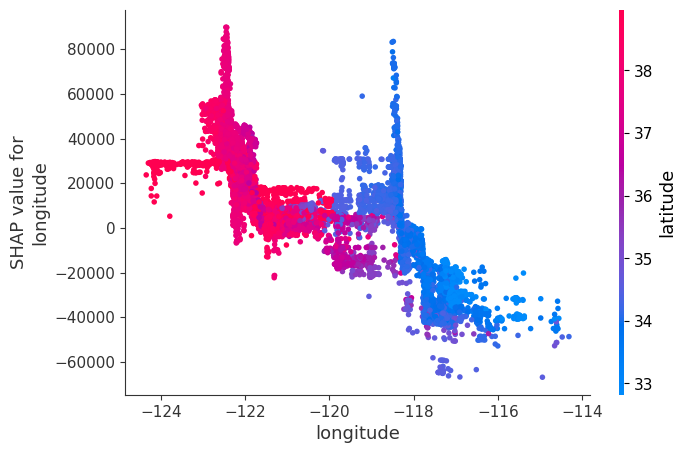

In [ ]:
shap.dependence_plot('longitude', shap_values, X_train)

# **9. Інтерпретація прогнозів у задачах класифікації за допомогою SHAP**  

У задачах **класифікації** SHAP допомагає зрозуміти, які ознаки найбільше впливають на рішення моделі, тобто **чому вона передбачила певний клас**.  

- Значення Шеплі показують, **наскільки кожна ознака зміщує прогноз** у бік одного з класів.  
- У бінарній класифікації модель зазвичай прогнозує **ймовірність класу 1**, і значення Шеплі визначають, **що підвищує чи знижує цю ймовірність**.  
- **Force Plot** дозволяє побачити, які саме ознаки вплинули на рішення для окремого прикладу.  

### **Приклад Force Plot для класифікації з більш складною моделлю**
Дані для класифікаї згенеруємо (для простоти).
Модель побудуємо ансаиблеву з `VotingClassifier` і тоді для побудови shap values нам треба буде використати вже інший метод - `KernelExplainer`, в який ми передаємо передбачення моделі (будь-якої) і дані, на яких були зроблені ці передбачення. Цей метод працює суттєво повільніше, тому ми знову робимо самплинг.

In [ ]:
?make_classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

# Створюємо синтетичні класифікаційні дані
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Перетворимо у DataFrame для зручності
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)

# Розбиваємо дані на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо ансамблеву модель (Voting Classifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')

# Навчаємо модель
ensemble_model.fit(X_train, y_train)

# Переконайтеся, що X_train має правильний формат
explainer = shap.KernelExplainer(
    lambda x: ensemble_model.predict(pd.DataFrame(x, columns=X.columns)),
    X_train[:500])
shap_values = explainer.shap_values(pd.DataFrame(X_test[:10], columns=X.columns))


  0%|          | 0/10 [00:00<?, ?it/s]

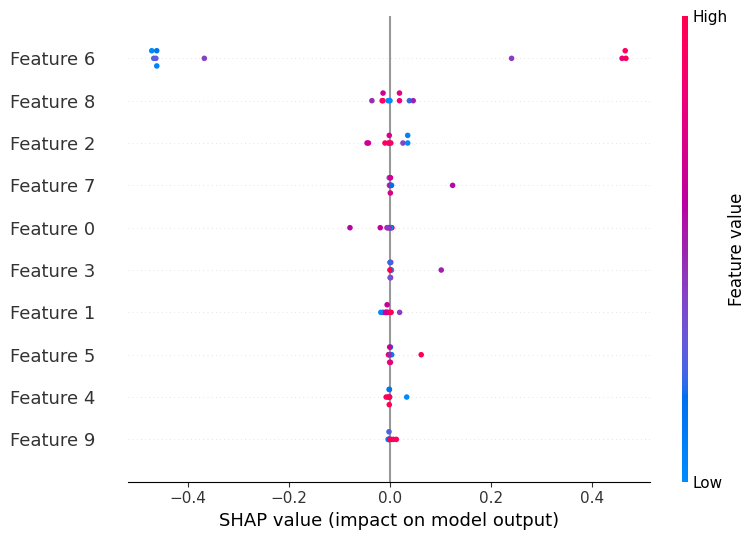

In [ ]:
shap.summary_plot(shap_values, X_test[:10])

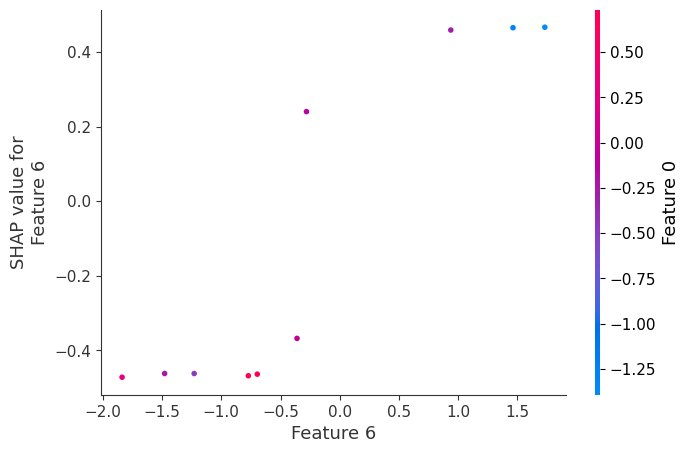

In [ ]:
# Візуалізація залежності однієї ознаки
shap.dependence_plot('Feature 6', shap_values, X_test[:10])

In [ ]:
shap_values[1]

array([ 1.33333333e-04, -6.30238095e-03,  3.44365079e-02, -7.35714286e-04,
       -1.66031746e-03,  3.12698413e-04,  4.66402381e-01, -3.46031746e-04,
        1.81753968e-02, -2.41587302e-03])

In [ ]:
# Вибираємо один запис для пояснення
i = 0  # Номер рядка у тестовому наборі

# Візуалізуємо вплив ознак на прогноз для цього запису
shap.initjs()
shap.force_plot(
    explainer.expected_value,  # Базове значення для імовірності класу 1
    shap_values[1],  # Значення Шеплі для класу 1
    X_test.iloc[i]  # Ознаки клієнта
)

### **Як інтерпретувати цей графік?**
- **Базове значення** – середня ймовірність класу 1 у моделі.  
- **Позитивні значення Шеплі (червоні стрілки)** – ознаки, які **збільшують ймовірність** класу 1.  
- **Негативні значення (сині стрілки)** – ознаки, які **зменшують ймовірність** класу 1.  
- Чим довша стрілка, тим **сильніший вплив** ознаки.  


# **8. Посилання**

Більше про виокристання SHAP можна дізнатись з наступних джерел:

1. https://github.com/slundberg/shap
2. https://www.kaggle.com/dansbecker/shap-values
3. https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values
4. https://christophm.github.io/interpretable-ml-book/
5. https://christophm.github.io/interpretable-ml-book/shapley.html
6. https://christophm.github.io/interpretable-ml-book/shap.html
7. https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
8. https://medium.com/towards-data-science/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a